In [125]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [126]:
df = pd.read_csv('data.csv', header=None)

In [127]:
class NeuralNetwork(nn.Module):
    def __init__(self ):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(2, 16)
        self.hidden1 = nn.Linear(16, 8)
        self.hidden2 = nn.Linear(8, 4)
        self.hidden3 = nn.Linear(4, 2)
        self.output = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        first_layer = self.input_layer(x)
        act1 = self.sigmoid(first_layer)
        second_layer = self.hidden1(act1)
        act2 = self.sigmoid(second_layer)
        thrid_layer = self.hidden2(act2)
        act3 = self.sigmoid(thrid_layer)
        fourth_layer = self.hidden3(act3)
        act4 = self.sigmoid(fourth_layer)
        out_layer = self.output(act4)
        prediction = self.sigmoid(out_layer)
        return prediction

In [139]:
model = NeuralNetwork()

epochs = 1000

optim = T.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

X = T.from_numpy(df[[0,1]].values).float()
y = T.from_numpy(df[[2]].values).float()

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

train_losses = []
test_losses = []
accuracy = []

for epoch in range(epochs):
    optim.zero_grad() #reset gradients
    pred = model.forward(X) #make the prediction
    loss = criterion(pred, y) #computing the loss
    loss.backward() #passing backwars
    optim.step() #saving weights\
    train_losses.append(loss)

    # evaluate
    model.eval()
    with T.no_grad():
        # print(x_test.shape)
        # print(y_test.shape)
        test_preds = model.forward(x_test)
        test_loss = criterion(test_preds, y_test)
        test_losses.append(test_loss.item())
        # how to check the accuracy is up to you (NO SKLEARN ALLOWED)
        prediction = model(x_test) > 0.5
        prediction = T.tensor(prediction).reshape(-1,1)
        accuracy.append((prediction == y_test).sum() / len(y_test))
    model.train()

    print(f'Epoch: {epoch + 1} | loss: {loss.item()} | accuracy: {accuracy[epoch]} ')

/var/folders/57/x7svmv1x253fpczm114w1chm0000gn/T/ipykernel_24009/817353001.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prediction = T.tensor(prediction).reshape(-1,1)


Epoch: 1 | loss: 0.7010467648506165 | accuracy: 0.5666666626930237 
Epoch: 2 | loss: 0.7009040117263794 | accuracy: 0.5666666626930237 
Epoch: 3 | loss: 0.7007623910903931 | accuracy: 0.5666666626930237 
Epoch: 4 | loss: 0.7006217837333679 | accuracy: 0.5666666626930237 
Epoch: 5 | loss: 0.7004824876785278 | accuracy: 0.5666666626930237 
Epoch: 6 | loss: 0.7003440856933594 | accuracy: 0.5666666626930237 
Epoch: 7 | loss: 0.700206995010376 | accuracy: 0.5666666626930237 
Epoch: 8 | loss: 0.7000709772109985 | accuracy: 0.5666666626930237 
Epoch: 9 | loss: 0.6999361515045166 | accuracy: 0.5666666626930237 
Epoch: 10 | loss: 0.699802577495575 | accuracy: 0.5666666626930237 
Epoch: 11 | loss: 0.6996701955795288 | accuracy: 0.5666666626930237 
Epoch: 12 | loss: 0.6995391845703125 | accuracy: 0.5666666626930237 
Epoch: 13 | loss: 0.6994093060493469 | accuracy: 0.5666666626930237 
Epoch: 14 | loss: 0.699280858039856 | accuracy: 0.5666666626930237 
Epoch: 15 | loss: 0.69915372133255 | accuracy:

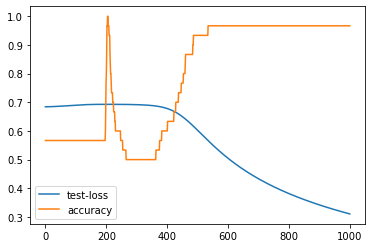

In [140]:
# plt.plot(train_losses, label='train-loss')
plt.plot(test_losses, label='test-loss')
plt.plot(accuracy, label='accuracy')
plt.legend()
plt.show()
